In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:\\Users\\karthick\\Pictures\\Titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

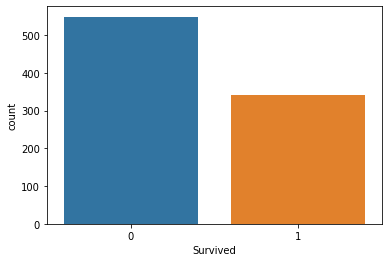

In [5]:
sns.countplot(x="Survived",data=df)

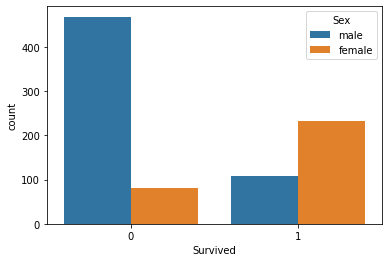

In [6]:
sns.countplot(x="Survived",hue="Sex",data=df)

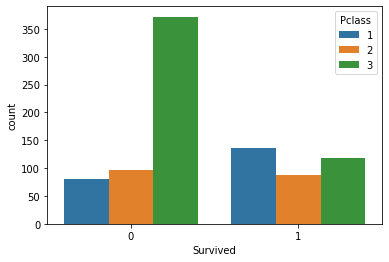

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=df)

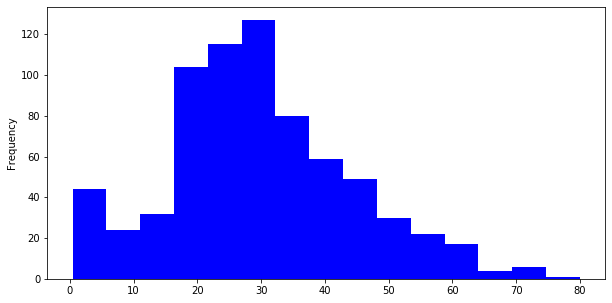

In [8]:
df["Age"].plot.hist(bins=15,figsize=(10,5),color="blue")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


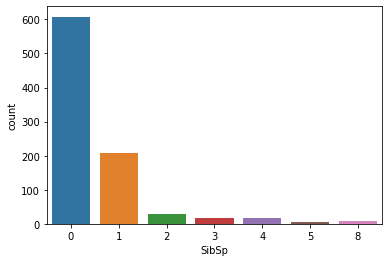

In [10]:
sns.countplot(x="SibSp",data=df)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

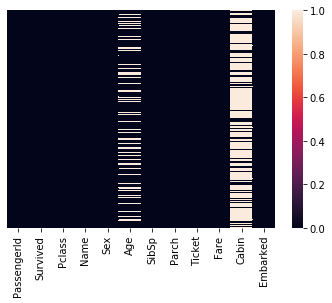

In [12]:
sns.heatmap(df.isnull(),yticklabels=False)

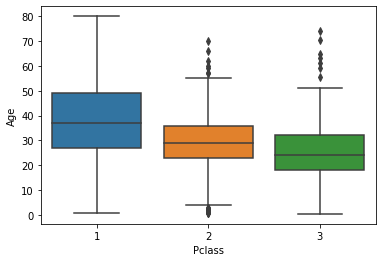

In [13]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [14]:
sex=pd.get_dummies(df["Sex"],drop_first="First")

In [15]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
embark=pd.get_dummies(df["Embarked"],drop_first=False)

In [17]:
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
Pc1=pd.get_dummies(df["Pclass"],drop_first=True)

In [19]:
Pc1.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [20]:
df=pd.concat([df,sex,embark,Pc1],axis=1)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0,1


In [22]:
df.drop(["Cabin","Name","Parch","Ticket","Sex","Age","Embarked"],axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Fare,male,C,Q,S,2,3
0,1,0,3,1,7.2500,1,0,0,1,0,1
1,2,1,1,1,71.2833,0,1,0,0,0,0
2,3,1,3,0,7.9250,0,0,0,1,0,1
3,4,1,1,1,53.1000,0,0,0,1,0,0
4,5,0,3,0,8.0500,1,0,0,1,0,1


In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Fare           0
male           0
C              0
Q              0
S              0
2              0
3              0
dtype: int64

In [25]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test ,y_train ,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
logmodel=LogisticRegression()

In [29]:
logmodel.fit(X_train,y_train)

C:\Users\karthick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions=logmodel.predict(X_test)

In [31]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.75      0.86      0.80       153\n           1       0.77      0.61      0.68       115\n\n    accuracy                           0.75       268\n   macro avg       0.76      0.74      0.74       268\nweighted avg       0.76      0.75      0.75       268\n'

In [34]:
confusion_matrix(y_test,predictions)

array([[132,  21],
       [ 45,  70]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,predictions)*100

75.3731343283582

In [37]:
# build another model

In [38]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Fare,male,C,Q,S,2,3
0,1,0,3,1,7.2500,1,0,0,1,0,1
1,2,1,1,1,71.2833,0,1,0,0,0,0
2,3,1,3,0,7.9250,0,0,0,1,0,1
3,4,1,1,1,53.1000,0,0,0,1,0,0
4,5,0,3,0,8.0500,1,0,0,1,0,1


In [39]:
df.drop(["SibSp","Fare","Pclass"],axis=1,inplace=True)

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
male           0
C              0
Q              0
S              0
2              0
3              0
dtype: int64

In [41]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test ,y_train ,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
logmodel=LogisticRegression()

In [45]:
logmodel.fit(X_train,y_train)

C:\Users\karthick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions=logmodel.predict(X_test)

In [47]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.73      0.87      0.79       153\n           1       0.77      0.57      0.66       115\n\n    accuracy                           0.74       268\n   macro avg       0.75      0.72      0.73       268\nweighted avg       0.75      0.74      0.74       268\n'

In [50]:
confusion_matrix(y_test,predictions)

array([[133,  20],
       [ 49,  66]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,predictions)*100

74.25373134328358

In [53]:
#build one more model to increase a accuracy score

In [54]:
df=pd.read_csv("C:\\Users\\karthick\\Pictures\\Titanic.csv")

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
df.drop(["Cabin","Name","Parch"],axis=1,inplace=True)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,113803,53.1000,S
4,5,0,3,male,35.0,0,373450,8.0500,S


In [59]:
sex=pd.get_dummies(df["Sex"],drop_first="First")

In [60]:
embark=pd.get_dummies(df["Embarked"],drop_first=False)

In [61]:
Pc1=pd.get_dummies(df["Pclass"],drop_first=True)

In [62]:
df=pd.concat([df,sex,embark,Pc1],axis=1)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked,male,C,Q,S,2,3
0,1,0,3,male,22.0,1,A/5 21171,7.2500,S,1,0,0,1,0,1
1,2,1,1,female,38.0,1,PC 17599,71.2833,C,0,1,0,0,0,0
2,3,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,1
3,4,1,1,female,35.0,1,113803,53.1000,S,0,0,0,1,0,0
4,5,0,3,male,35.0,0,373450,8.0500,S,1,0,0,1,0,1


In [64]:
df.columns

Index(['PassengerId',    'Survived',      'Pclass',         'Sex',
               'Age',       'SibSp',      'Ticket',        'Fare',
          'Embarked',        'male',           'C',           'Q',
                 'S',             2,             3],
      dtype='object')

In [65]:
df.drop(["Embarked","Sex","Pclass","Ticket"],axis=1,inplace=True)

In [66]:
df.head()

,PassengerId,Survived,Age,SibSp,Fare,male,C,Q,S,2,3
0,1,0,22.0,1,7.2500,1,0,0,1,0,1
1,2,1,38.0,1,71.2833,0,1,0,0,0,0
2,3,1,26.0,0,7.9250,0,0,0,1,0,1
3,4,1,35.0,1,53.1000,0,0,0,1,0,0
4,5,0,35.0,0,8.0500,1,0,0,1,0,1


In [67]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [68]:
df.head()

,PassengerId,Survived,Age,SibSp,Fare,male,C,Q,S,2,3
0,1,0,22.0,1,7.2500,1,0,0,1,0,1
1,2,1,38.0,1,71.2833,0,1,0,0,0,0
2,3,1,26.0,0,7.9250,0,0,0,1,0,1
3,4,1,35.0,1,53.1000,0,0,0,1,0,0
4,5,0,35.0,0,8.0500,1,0,0,1,0,1


In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Fare             0
male             0
C                0
Q                0
S                0
2                0
3                0
dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [89]:
df.drop(["PassengerId"],axis=1,inplace=True)

In [ ]:
df.drop(["Age","Fare"],axis=1,inplace=True)

In [90]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [91]:
X_train, X_test ,y_train ,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
logmodel=LogisticRegression()

In [93]:
logmodel.fit(X_train,y_train)

C:\Users\karthick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [95]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.73      0.87      0.79       153\n           1       0.77      0.57      0.66       115\n\n    accuracy                           0.74       268\n   macro avg       0.75      0.72      0.73       268\nweighted avg       0.75      0.74      0.74       268\n'

In [96]:
confusion_matrix(y_test,predictions)

array([[133,  20],
       [ 49,  66]], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7425373134328358

In [99]:
df=pd.DataFrame({'Actual':predictions,'predicted':y_test})

In [100]:
df.head()

,Actual,predicted
862,1,1
223,0,0
84,1,1
680,1,0
535,1,1
